In [1]:
# Author : Sercan Aksoy
# Last Update: 13.09.2021
# Subject : Speech Emotion Recognition

In [2]:
# Importing Libraries which
# let processing on audio files
import librosa
from IPython.display import Audio

In [3]:
# Display libraries
import matplotlib.pyplot as plt
import librosa.display
import seaborn as sns

In [4]:
# Core libraries
import os
import sys
import pandas as pd
import numpy as np

In [5]:
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [6]:
# Data Set Preparation
# I am going to use
#     - 5 datasets from internet (Ravdess,Crema,Tess,Savee,Emo-db)
#     - 1 I've composed it

In [7]:
# Data Set Paths
ravdess_path = "datasets/ravdess/audio_speech_actors_01-24/"
crema_path = "datasets/crema-d/AudioWAV/"
tess_path = "datasets/tess/TESS Toronto emotional speech set data/"
savee_path = "datasets/savee/ALL/"
emo_db_path = "datasets/emo-db/"
mydataset_path = "mydataset/wav/"

In [8]:
# RAVDESS
'''
Beyond the ravdess_path there are 24 folders
which are named as Actors and theirs indexes
Example Folder Name: Actor_01
Every Actor folder contains 60 .wav files
Example File Name: 03-01-01-01-01-02-03.wav
'''

Audio(ravdess_path + "Actor_01/03-01-01-01-01-01-01.wav")

# About RAVDESS File naming
# There are 7 sections in every .wav file name
# Section 1 : Modality (01 = full-AV, 02 = video-only, 03 = audio-only)
# Section 2 : Vocal channel (01 = speech, 02 = song)
# Section 3 : Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised)
# Section 4 : Emotional intensity (01 = normal, 02 = strong)NOTE: There is no strong intensity for the 'neutral' emotion.
# Section 5 : Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door")
# Section 6 : Repetition (01 = 1st repetition, 02 = 2nd repetition)
# Section 7 : Actor (01 to 24. Odd numbered actors are male, even numbered actors are female)

In [9]:
ravdess_directory_list = os.listdir(ravdess_path)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    # as there are 24 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(ravdess_path + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(ravdess_path + dir + '/' + file) # specifying the exact file
        
# Emotion column for the dataframe
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# File path info column for the dataframe
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# Changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

Emotions                                               Path
0  neutral  datasets/ravdess/audio_speech_actors_01-24/Act...
1  neutral  datasets/ravdess/audio_speech_actors_01-24/Act...
2  neutral  datasets/ravdess/audio_speech_actors_01-24/Act...
3  neutral  datasets/ravdess/audio_speech_actors_01-24/Act...
4     calm  datasets/ravdess/audio_speech_actors_01-24/Act...

In [10]:
# CREMA
'''
Beyond the crema_path there are 
7442 .wav files
Example File Name: 1002_IEO_HAP_MD.wav
'''

Audio(crema_path + "1002_IEO_HAP_MD.wav")

# About CREMA File naming
# There are 4 sections in every .wav file name
# Section 1 : Actor number (10xx)
# Section 2 : Ethnic (African America, Asian, Caucasian, Hispanic, and Unspecified)
# Section 3 : Emotion (NEU = neutral, HAP = happy, SAD = sad, ANG = angry, FEA = fearful, DIS = disgust)
# Section 4 : Emotional intensity (LO = Low, MD = Medium, HI = High, XX = Unspecified)

In [11]:
crema_directory_list = os.listdir(crema_path)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(crema_path + file)
    # storing file emotions
    # changing emotion abbreviations to the label names
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')

        
# Emotion column for the dataframe
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# File path info column for the dataframe
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()

Emotions                                           Path
0    angry  datasets/crema-d/AudioWAV/1001_DFA_ANG_XX.wav
1  disgust  datasets/crema-d/AudioWAV/1001_DFA_DIS_XX.wav
2     fear  datasets/crema-d/AudioWAV/1001_DFA_FEA_XX.wav
3    happy  datasets/crema-d/AudioWAV/1001_DFA_HAP_XX.wav
4  neutral  datasets/crema-d/AudioWAV/1001_DFA_NEU_XX.wav

In [12]:
# TESS
'''
Beyond the tess_path there are 14 folders
which are named as Speakers names and emotion
Example Folder Name: OAF_Fear
Every specified folder contains 200 .wav files
Example File Name: OAF_bean_fear.wav
'''

Audio(tess_path + "OAF_Fear/OAF_back_fear.wav")

# About CREMA File naming
# There are 3 sections in every .wav file name
# Section 1 : Name Abbreviation (OAF, YAF)
# Section 2 : The Word (There are 200 word said in audio files. "Say the word _")
# Section 3 : Emotion (neutral = neutral, happy = happy, sad = sad, angry = angry, fear = fearful, disgust = disgust, ps = surprised)

In [13]:
tess_directory_list = os.listdir(tess_path)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(tess_path + dir)
    for file in directories: # There are 14 directories specified with the Actor and Emotion
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':       # Only difference between labels is surprise so we have to fix that
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(tess_path + dir + '/' + file)
        
# Emotion column for the dataframe
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# File path info column for the dataframe
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()

Emotions                                               Path
0    angry  datasets/tess/TESS Toronto emotional speech se...
1    angry  datasets/tess/TESS Toronto emotional speech se...
2    angry  datasets/tess/TESS Toronto emotional speech se...
3    angry  datasets/tess/TESS Toronto emotional speech se...
4    angry  datasets/tess/TESS Toronto emotional speech se...

In [14]:
# SAVEE
'''
Beyond the savee_path there are
480 .wav files
Example File Name: DC_f07.wav
'''

Audio(savee_path + "DC_f07.wav")

# About SAVEE File naming
# There are 3 sections in every .wav file name
# Section 1 : Name Abbreviation (DC, JE, JK, KL)
# Section 2 : Emotion (n = neutral, a = anger, d = disgust, f = fear, h = happiness, sa = sadness, su = surprise)
# Section 3 : Sentences number (Totally 15 distinct sentences)

In [15]:
savee_directory_list = os.listdir(savee_path)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(savee_path + file)
    part = file.split('_')[1]
    ele = part[:-6] # '#.wav' is eliminated 
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')
        
# Emotion column for the dataframe
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# File path info column for the dataframe
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()

Emotions                           Path
0    angry  datasets/savee/ALL/DC_a01.wav
1    angry  datasets/savee/ALL/DC_a02.wav
2    angry  datasets/savee/ALL/DC_a03.wav
3    angry  datasets/savee/ALL/DC_a04.wav
4    angry  datasets/savee/ALL/DC_a05.wav

In [16]:
# EMO-DB
'''
Beyond the emo_db_path there are 
535 .wav files spoken by German language
Example File Name: 03a02Fc.wav
'''

Audio(emo_db_path + "03a02Fc.wav")

# About EMO-DB File naming
# There are 4 sections in every .wav file name
# Section 1 : Spekaer number (xx)
# Section 2 : Code for text (xxx)
# Section 3 : Emotion (W = angery, L = bored, E = disgust, A = fearful, F = happy, T = sad, N = neutral)
# Section 4 : Version (a,b,c,..)

In [17]:
emodb_directory_list = os.listdir(emo_db_path)

file_emotion = []
file_path = []
file_gender = []
female = [8, 9, 13, 14, 16]

for file in emodb_directory_list:
    file_path.append(emo_db_path + file)
    #if int(file[:2]) in female:
        #print(int(file[:2])) 
       #file_gender.append(0)
    #else:
       #file_gender.append(1)
    
    if file[5] == 'W':  # Ärger (Wut) -> Angry
        file_emotion.append('angry')
    elif file[5] == 'L':  # Langeweile -> Boredom
        file_emotion.append('bored')
    elif file[5] == 'E':  # Ekel -> Disgusted
        file_emotion.append('disgust')
    elif file[5] == 'A':  # Angst -> Angry
        file_emotion.append('fear')
    elif file[5] == 'F':  # Freude -> Happiness
        file_emotion.append('happy')
    elif file[5] == 'T':  # Trauer -> Sadness
        file_emotion.append('sad')
    elif file[5] == 'N':
        file_emotion.append('neutral')
        
# Emotion column for the dataframe
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# File path info column for the dataframe
path_df = pd.DataFrame(file_path, columns=['Path'])
Emodb_df = pd.concat([emotion_df, path_df], axis=1)
Emodb_df.head()

Emotions                         Path
0    happy  datasets/emo-db/03a01Fa.wav
1  neutral  datasets/emo-db/03a01Nc.wav
2    angry  datasets/emo-db/03a01Wa.wav
3    happy  datasets/emo-db/03a02Fc.wav
4  neutral  datasets/emo-db/03a02Nc.wav

In [18]:
# MYDATASET
'''
Beyond the mydataset_path there are
450 .wav files
Example File Name: 03-02-03-02-01.wav
'''

Audio(mydataset_path + "03-02-03-02-01.wav")

# About MYDATASET File naming
# There are 5 sections in every .wav file name
# Section 1 : Speakers number
# Section 2 : Speakers sex (01 = male, 02 = female)
# Section 3 : Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised)
# Section 4 : Statement (01 = "çocuklar telefonla konuşuyor", 02 = "ben buraya ilk defa geldim", 03 = "açıkcası hiç beklemiyordum")
# Section 5 : Emotional intensity (01 = normal, 02 = strong)NOTE: There is no strong intensity for the 'neutral' emotion.

In [19]:
# all files in mydataset should be
# turned into dataframes which has 
# 2 columns as emotions and paths
mydataset_directory_list = os.listdir(mydataset_path)

file_emotion = []
file_path = []

for file in mydataset_directory_list:
    part = file.split('.')[0]
    part = part.split('-')
    # third part in each file represents the emotion associated to that file.
    file_emotion.append(int(part[2]))
    file_path.append(mydataset_path + file)  
    
# Emotion column for the dataframe
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# File path info column for the dataframe
path_df = pd.DataFrame(file_path, columns=['Path'])
MyDataset_df = pd.concat([emotion_df, path_df], axis=1)

# Changing integers to actual emotions.
MyDataset_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
MyDataset_df.head()

Emotions                              Path
0  neutral  mydataset/wav/01-01-01-01-01.wav
1  neutral  mydataset/wav/01-01-01-02-01.wav
2  neutral  mydataset/wav/01-01-01-03-01.wav
3     calm  mydataset/wav/01-01-02-01-01.wav
4     calm  mydataset/wav/01-01-02-01-02.wav

In [20]:
# Merging all data frames created above
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df, Emodb_df, MyDataset_df], axis = 0)
data_path.head()

Emotions                              Path
0  neutral  mydataset/wav/01-01-01-01-01.wav
1  neutral  mydataset/wav/01-01-01-02-01.wav
2  neutral  mydataset/wav/01-01-01-03-01.wav
3     calm  mydataset/wav/01-01-02-01-01.wav
4     calm  mydataset/wav/01-01-02-01-02.wav

In [21]:
# From here all audio files matched with
# their labels and ready to process phase
data_path.shape

(225, 2)

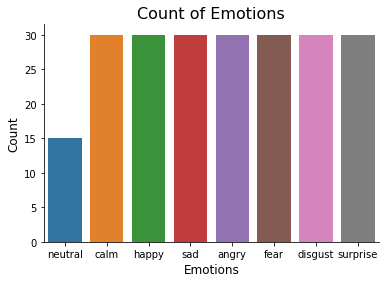

In [22]:
plt.title('Count of Emotions', size=16)
sns.countplot(data_path.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [23]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

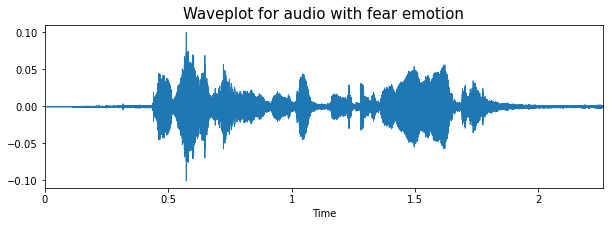

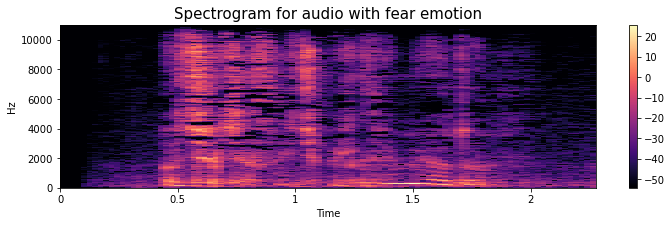

In [71]:
emotion='fear'
path = np.array(data_path.Path[data_path.Emotions==emotion])[-1] # Turkish voices appended last
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

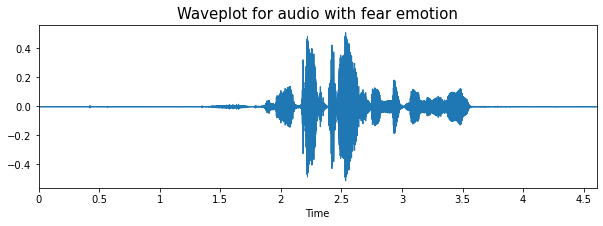

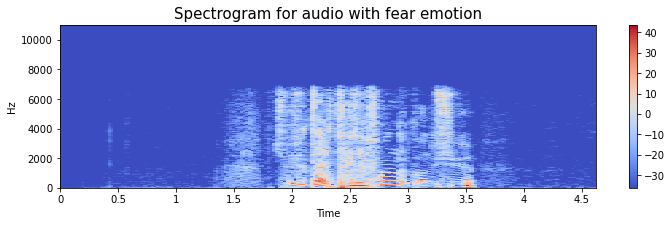

In [25]:
emotion='fear'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1] # To compare 2 fear emotion audios
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

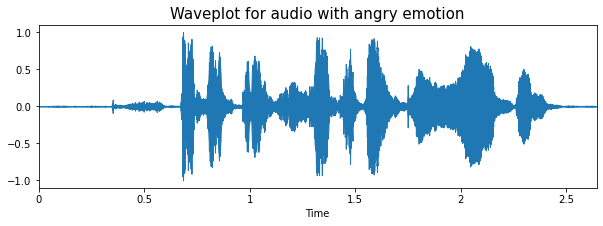

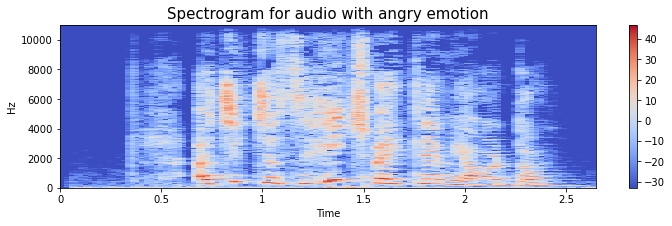

In [26]:
emotion='angry'
path = np.array(data_path.Path[data_path.Emotions==emotion])[-1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

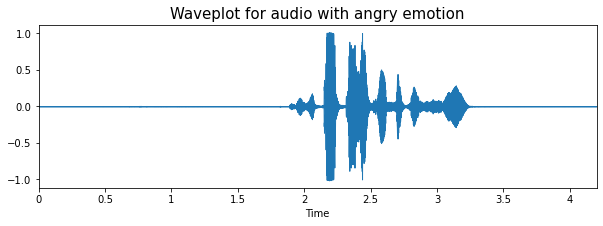

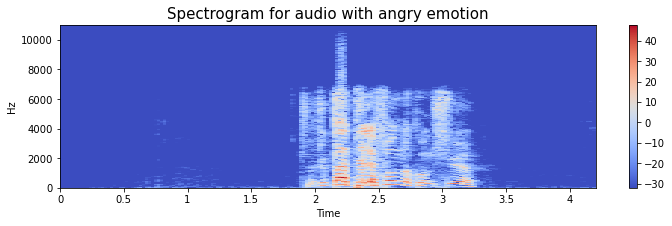

In [27]:
emotion='angry'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

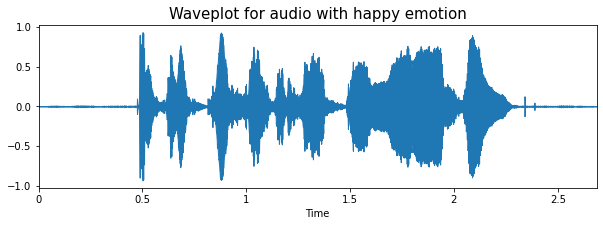

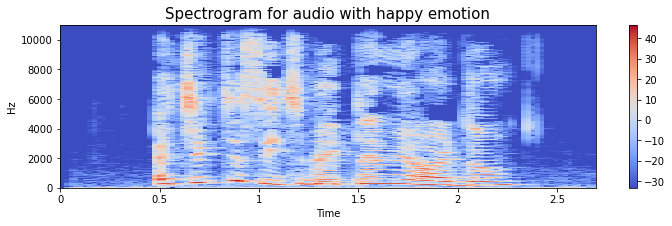

In [28]:
emotion='happy'
path = np.array(data_path.Path[data_path.Emotions==emotion])[-1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

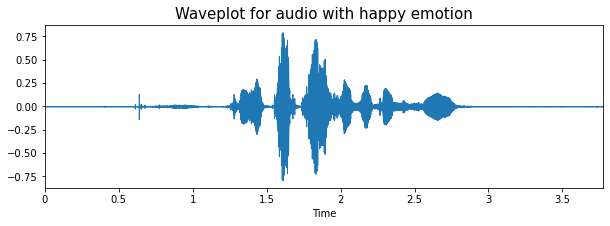

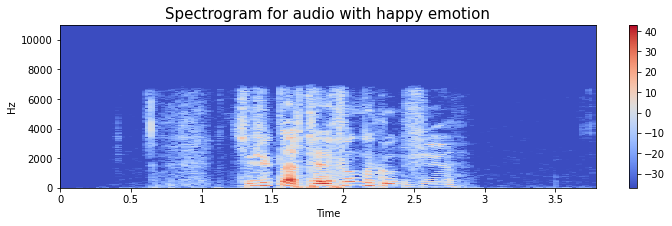

In [29]:
emotion='happy'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

In [30]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

In [31]:
# taking any example and checking for techniques.
path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)

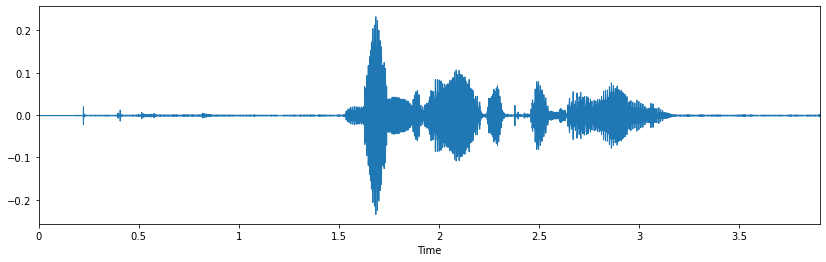

In [32]:
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=data, sr=sample_rate)
Audio(path)

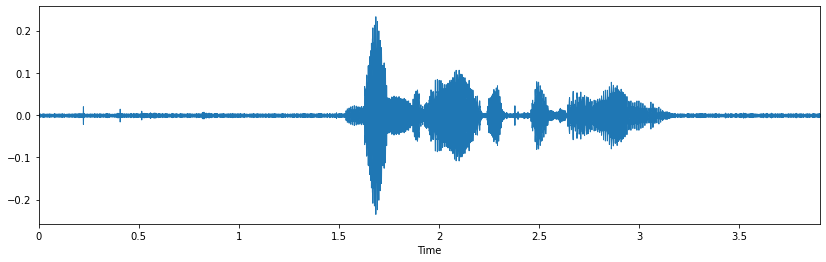

In [33]:
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

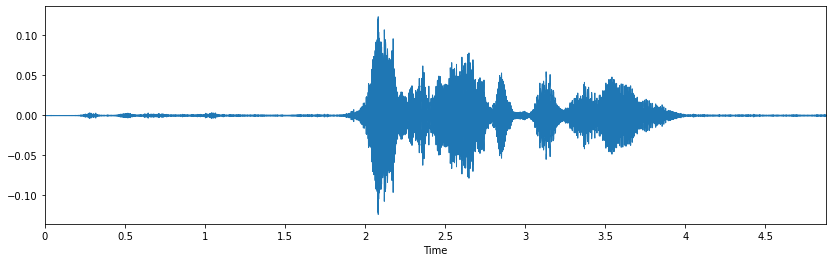

In [34]:
x = stretch(data)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

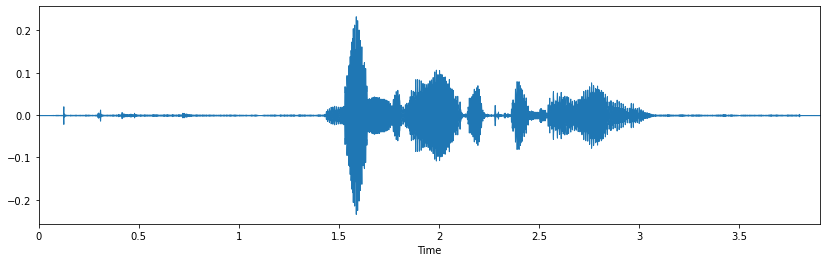

In [35]:
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

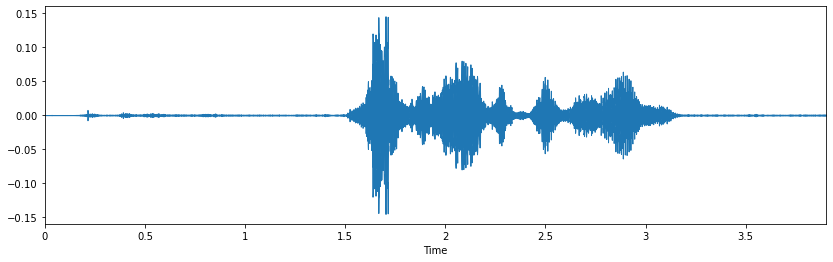

In [36]:
x = pitch(data, sample_rate)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

In [45]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally
    
    return result

def get_features(path):
    data, sample_rate = librosa.load(path) # Probably different durations will cause erros
    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically
    
    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically
    
    return result
    
def get_features_noeffect(path):
    data, sample_rate = librosa.load(path) 
    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    return result

In [46]:
data_path = data_path.sample(frac=1).reset_index(drop=True)
test_df = data_path.iloc[:int(data_path.shape[0]*0.2)].reset_index(drop=True)
train_df = data_path.iloc[int(data_path.shape[0]*0.2):].reset_index(drop=True)

In [47]:
train_df.shape

(180, 2)

In [48]:
x_train, x_test, y_train, y_test = [], [], [], []
for path, emotion in zip(train_df.Path, train_df.Emotions):
    feature = get_features(path)
    print(".", end='') # To track progress
    for ele in feature:
        x_train.append(ele)
        y_train.append(emotion)
for path, emotion in zip(test_df.Path, test_df.Emotions):
    feature = get_features_noeffect(path)
    print(".", end='') # To track progress
    x_test.append(feature)
    y_test.append(emotion)

.................................................................................................................................................................................................................................

In [49]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [50]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((540, 162), (540,), (45, 162), (45,))

In [51]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import Perceptron
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import preprocessing



from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [52]:
logistic_reg_model = LogisticRegressionCV(cv=10,random_state=0)
logistic_reg_model.fit(x_train,y_train)

LogisticRegressionCV(cv=10, random_state=0)

In [53]:
knn_model = KNeighborsClassifier(n_neighbors=30)
param_grid = {'n_neighbors': np.arange(4, 50)}
knn_gscv = GridSearchCV(knn_model, param_grid, cv=10)
knn_gscv.fit(x_train,y_train)

best_p = knn_gscv.best_params_
knn_model = KNeighborsClassifier(n_neighbors=best_p.get('n_neighbors'))
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [54]:
dec_t_model = DecisionTreeClassifier()
tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
clf = GridSearchCV(dec_t_model, tree_para, cv=10)
clf.fit(x_train,y_train)

best_p = clf.best_params_
dec_t_model = DecisionTreeClassifier(criterion = best_p.get('criterion'), max_depth = best_p.get('max_depth'))
dec_t_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=150)

In [55]:
gradient_b_model = GradientBoostingClassifier()
param_grid = {
            'learning_rate':[0.01,0.02,0.03],
            'subsample':[0.9, 0.5, 0.2],
            'n_estimators':[10,20,30],
            'max_depth':[4,6,8,10,12]
        }
grid = GridSearchCV(estimator=gradient_b_model, param_grid=param_grid, cv=5, verbose=5, n_jobs=-1)
grid.fit(x_train,y_train)

best_p = grid.best_params_
gradient_b_model = GradientBoostingClassifier(learning_rate=best_p.get('learning_rate'), max_depth=best_p.get('max_depth'),
                                             n_estimators=best_p.get('n_estimators'), subsample = best_p.get('subsample'))
gradient_b_model.fit(x_train,y_train)

Fitting 5 folds for each of 135 candidates, totalling 675 fits


GradientBoostingClassifier(learning_rate=0.02, max_depth=8, n_estimators=20,
                           subsample=0.9)

In [56]:
random_forest_model = RandomForestClassifier()
param_grid = { 
            'n_estimators': [10, 15, 20],
            'max_features': ['auto', 'sqrt', 'log2'],
            'max_depth' : [4,5,6,7,8,10,12],
            'criterion' :['gini', 'entropy']
        }
CV_rfc = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, cv=5, verbose=10)
CV_rfc.fit(x_train,y_train)

best_p = CV_rfc.best_params_
random_forest_model = RandomForestClassifier(n_estimators=best_p.get('n_estimators'), max_features=best_p.get('max_features'),
                                            max_depth = best_p.get('max_depth'), criterion = best_p.get('criterion'))
random_forest_model.fit(x_train,y_train)

Fitting 5 folds for each of 126 candidates, totalling 630 fits
[CV 1/5; 1/126] START criterion=gini, max_depth=4, max_features=auto, n_estimators=10
[CV 1/5; 1/126] END criterion=gini, max_depth=4, max_features=auto, n_estimators=10;, score=0.259 total time=   0.0s
[CV 2/5; 1/126] START criterion=gini, max_depth=4, max_features=auto, n_estimators=10
[CV 2/5; 1/126] END criterion=gini, max_depth=4, max_features=auto, n_estimators=10;, score=0.269 total time=   0.0s
[CV 3/5; 1/126] START criterion=gini, max_depth=4, max_features=auto, n_estimators=10
[CV 3/5; 1/126] END criterion=gini, max_depth=4, max_features=auto, n_estimators=10;, score=0.176 total time=   0.0s
[CV 4/5; 1/126] START criterion=gini, max_depth=4, max_features=auto, n_estimators=10
[CV 4/5; 1/126] END criterion=gini, max_depth=4, max_features=auto, n_estimators=10;, score=0.157 total time=   0.0s
[CV 5/5; 1/126] START criterion=gini, max_depth=4, max_features=auto, n_estimators=10
[CV 5/5; 1/126] END criterion=gini, max

[CV 1/5; 10/126] END criterion=gini, max_depth=5, max_features=auto, n_estimators=10;, score=0.306 total time=   0.0s
[CV 2/5; 10/126] START criterion=gini, max_depth=5, max_features=auto, n_estimators=10
[CV 2/5; 10/126] END criterion=gini, max_depth=5, max_features=auto, n_estimators=10;, score=0.269 total time=   0.0s
[CV 3/5; 10/126] START criterion=gini, max_depth=5, max_features=auto, n_estimators=10
[CV 3/5; 10/126] END criterion=gini, max_depth=5, max_features=auto, n_estimators=10;, score=0.269 total time=   0.0s
[CV 4/5; 10/126] START criterion=gini, max_depth=5, max_features=auto, n_estimators=10
[CV 4/5; 10/126] END criterion=gini, max_depth=5, max_features=auto, n_estimators=10;, score=0.213 total time=   0.0s
[CV 5/5; 10/126] START criterion=gini, max_depth=5, max_features=auto, n_estimators=10
[CV 5/5; 10/126] END criterion=gini, max_depth=5, max_features=auto, n_estimators=10;, score=0.167 total time=   0.0s
[CV 1/5; 11/126] START criterion=gini, max_depth=5, max_featur

[CV 4/5; 18/126] END criterion=gini, max_depth=5, max_features=log2, n_estimators=20;, score=0.176 total time=   0.0s
[CV 5/5; 18/126] START criterion=gini, max_depth=5, max_features=log2, n_estimators=20
[CV 5/5; 18/126] END criterion=gini, max_depth=5, max_features=log2, n_estimators=20;, score=0.194 total time=   0.0s
[CV 1/5; 19/126] START criterion=gini, max_depth=6, max_features=auto, n_estimators=10
[CV 1/5; 19/126] END criterion=gini, max_depth=6, max_features=auto, n_estimators=10;, score=0.269 total time=   0.0s
[CV 2/5; 19/126] START criterion=gini, max_depth=6, max_features=auto, n_estimators=10
[CV 2/5; 19/126] END criterion=gini, max_depth=6, max_features=auto, n_estimators=10;, score=0.361 total time=   0.0s
[CV 3/5; 19/126] START criterion=gini, max_depth=6, max_features=auto, n_estimators=10
[CV 3/5; 19/126] END criterion=gini, max_depth=6, max_features=auto, n_estimators=10;, score=0.194 total time=   0.0s
[CV 4/5; 19/126] START criterion=gini, max_depth=6, max_featur

[CV 1/5; 27/126] END criterion=gini, max_depth=6, max_features=log2, n_estimators=20;, score=0.306 total time=   0.0s
[CV 2/5; 27/126] START criterion=gini, max_depth=6, max_features=log2, n_estimators=20
[CV 2/5; 27/126] END criterion=gini, max_depth=6, max_features=log2, n_estimators=20;, score=0.352 total time=   0.0s
[CV 3/5; 27/126] START criterion=gini, max_depth=6, max_features=log2, n_estimators=20
[CV 3/5; 27/126] END criterion=gini, max_depth=6, max_features=log2, n_estimators=20;, score=0.222 total time=   0.0s
[CV 4/5; 27/126] START criterion=gini, max_depth=6, max_features=log2, n_estimators=20
[CV 4/5; 27/126] END criterion=gini, max_depth=6, max_features=log2, n_estimators=20;, score=0.231 total time=   0.0s
[CV 5/5; 27/126] START criterion=gini, max_depth=6, max_features=log2, n_estimators=20
[CV 5/5; 27/126] END criterion=gini, max_depth=6, max_features=log2, n_estimators=20;, score=0.259 total time=   0.0s
[CV 1/5; 28/126] START criterion=gini, max_depth=7, max_featur

[CV 3/5; 36/126] END criterion=gini, max_depth=7, max_features=log2, n_estimators=20;, score=0.204 total time=   0.0s
[CV 4/5; 36/126] START criterion=gini, max_depth=7, max_features=log2, n_estimators=20
[CV 4/5; 36/126] END criterion=gini, max_depth=7, max_features=log2, n_estimators=20;, score=0.231 total time=   0.0s
[CV 5/5; 36/126] START criterion=gini, max_depth=7, max_features=log2, n_estimators=20
[CV 5/5; 36/126] END criterion=gini, max_depth=7, max_features=log2, n_estimators=20;, score=0.213 total time=   0.0s
[CV 1/5; 37/126] START criterion=gini, max_depth=8, max_features=auto, n_estimators=10
[CV 1/5; 37/126] END criterion=gini, max_depth=8, max_features=auto, n_estimators=10;, score=0.269 total time=   0.0s
[CV 2/5; 37/126] START criterion=gini, max_depth=8, max_features=auto, n_estimators=10
[CV 2/5; 37/126] END criterion=gini, max_depth=8, max_features=auto, n_estimators=10;, score=0.259 total time=   0.0s
[CV 3/5; 37/126] START criterion=gini, max_depth=8, max_featur

[CV 5/5; 45/126] END criterion=gini, max_depth=8, max_features=log2, n_estimators=20;, score=0.241 total time=   0.0s
[CV 1/5; 46/126] START criterion=gini, max_depth=10, max_features=auto, n_estimators=10
[CV 1/5; 46/126] END criterion=gini, max_depth=10, max_features=auto, n_estimators=10;, score=0.278 total time=   0.0s
[CV 2/5; 46/126] START criterion=gini, max_depth=10, max_features=auto, n_estimators=10
[CV 2/5; 46/126] END criterion=gini, max_depth=10, max_features=auto, n_estimators=10;, score=0.296 total time=   0.0s
[CV 3/5; 46/126] START criterion=gini, max_depth=10, max_features=auto, n_estimators=10
[CV 3/5; 46/126] END criterion=gini, max_depth=10, max_features=auto, n_estimators=10;, score=0.222 total time=   0.0s
[CV 4/5; 46/126] START criterion=gini, max_depth=10, max_features=auto, n_estimators=10
[CV 4/5; 46/126] END criterion=gini, max_depth=10, max_features=auto, n_estimators=10;, score=0.269 total time=   0.0s
[CV 5/5; 46/126] START criterion=gini, max_depth=10, m

[CV 5/5; 54/126] END criterion=gini, max_depth=10, max_features=log2, n_estimators=20;, score=0.148 total time=   0.0s
[CV 1/5; 55/126] START criterion=gini, max_depth=12, max_features=auto, n_estimators=10
[CV 1/5; 55/126] END criterion=gini, max_depth=12, max_features=auto, n_estimators=10;, score=0.352 total time=   0.0s
[CV 2/5; 55/126] START criterion=gini, max_depth=12, max_features=auto, n_estimators=10
[CV 2/5; 55/126] END criterion=gini, max_depth=12, max_features=auto, n_estimators=10;, score=0.278 total time=   0.0s
[CV 3/5; 55/126] START criterion=gini, max_depth=12, max_features=auto, n_estimators=10
[CV 3/5; 55/126] END criterion=gini, max_depth=12, max_features=auto, n_estimators=10;, score=0.213 total time=   0.0s
[CV 4/5; 55/126] START criterion=gini, max_depth=12, max_features=auto, n_estimators=10
[CV 4/5; 55/126] END criterion=gini, max_depth=12, max_features=auto, n_estimators=10;, score=0.278 total time=   0.0s
[CV 5/5; 55/126] START criterion=gini, max_depth=12, 

[CV 1/5; 63/126] END criterion=gini, max_depth=12, max_features=log2, n_estimators=20;, score=0.306 total time=   0.0s
[CV 2/5; 63/126] START criterion=gini, max_depth=12, max_features=log2, n_estimators=20
[CV 2/5; 63/126] END criterion=gini, max_depth=12, max_features=log2, n_estimators=20;, score=0.352 total time=   0.0s
[CV 3/5; 63/126] START criterion=gini, max_depth=12, max_features=log2, n_estimators=20
[CV 3/5; 63/126] END criterion=gini, max_depth=12, max_features=log2, n_estimators=20;, score=0.250 total time=   0.0s
[CV 4/5; 63/126] START criterion=gini, max_depth=12, max_features=log2, n_estimators=20
[CV 4/5; 63/126] END criterion=gini, max_depth=12, max_features=log2, n_estimators=20;, score=0.231 total time=   0.0s
[CV 5/5; 63/126] START criterion=gini, max_depth=12, max_features=log2, n_estimators=20
[CV 5/5; 63/126] END criterion=gini, max_depth=12, max_features=log2, n_estimators=20;, score=0.241 total time=   0.0s
[CV 1/5; 64/126] START criterion=entropy, max_depth=4

[CV 1/5; 71/126] END criterion=entropy, max_depth=4, max_features=log2, n_estimators=15;, score=0.278 total time=   0.0s
[CV 2/5; 71/126] START criterion=entropy, max_depth=4, max_features=log2, n_estimators=15
[CV 2/5; 71/126] END criterion=entropy, max_depth=4, max_features=log2, n_estimators=15;, score=0.361 total time=   0.0s
[CV 3/5; 71/126] START criterion=entropy, max_depth=4, max_features=log2, n_estimators=15
[CV 3/5; 71/126] END criterion=entropy, max_depth=4, max_features=log2, n_estimators=15;, score=0.194 total time=   0.0s
[CV 4/5; 71/126] START criterion=entropy, max_depth=4, max_features=log2, n_estimators=15
[CV 4/5; 71/126] END criterion=entropy, max_depth=4, max_features=log2, n_estimators=15;, score=0.185 total time=   0.0s
[CV 5/5; 71/126] START criterion=entropy, max_depth=4, max_features=log2, n_estimators=15
[CV 5/5; 71/126] END criterion=entropy, max_depth=4, max_features=log2, n_estimators=15;, score=0.167 total time=   0.0s
[CV 1/5; 72/126] START criterion=en

[CV 5/5; 78/126] END criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=20;, score=0.204 total time=   0.0s
[CV 1/5; 79/126] START criterion=entropy, max_depth=5, max_features=log2, n_estimators=10
[CV 1/5; 79/126] END criterion=entropy, max_depth=5, max_features=log2, n_estimators=10;, score=0.194 total time=   0.0s
[CV 2/5; 79/126] START criterion=entropy, max_depth=5, max_features=log2, n_estimators=10
[CV 2/5; 79/126] END criterion=entropy, max_depth=5, max_features=log2, n_estimators=10;, score=0.269 total time=   0.0s
[CV 3/5; 79/126] START criterion=entropy, max_depth=5, max_features=log2, n_estimators=10
[CV 3/5; 79/126] END criterion=entropy, max_depth=5, max_features=log2, n_estimators=10;, score=0.213 total time=   0.0s
[CV 4/5; 79/126] START criterion=entropy, max_depth=5, max_features=log2, n_estimators=10
[CV 4/5; 79/126] END criterion=entropy, max_depth=5, max_features=log2, n_estimators=10;, score=0.269 total time=   0.0s
[CV 5/5; 79/126] START criterion=en

[CV 1/5; 87/126] END criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=20;, score=0.306 total time=   0.0s
[CV 2/5; 87/126] START criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=20
[CV 2/5; 87/126] END criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=20;, score=0.343 total time=   0.0s
[CV 3/5; 87/126] START criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=20
[CV 3/5; 87/126] END criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=20;, score=0.157 total time=   0.0s
[CV 4/5; 87/126] START criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=20
[CV 4/5; 87/126] END criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=20;, score=0.222 total time=   0.0s
[CV 5/5; 87/126] START criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=20
[CV 5/5; 87/126] END criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=20;, score=0.111 total time=   0.0s
[CV 1/5; 88/126] START criterion=en

[CV 5/5; 94/126] END criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=10;, score=0.222 total time=   0.0s
[CV 1/5; 95/126] START criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=15
[CV 1/5; 95/126] END criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=15;, score=0.333 total time=   0.0s
[CV 2/5; 95/126] START criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=15
[CV 2/5; 95/126] END criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=15;, score=0.324 total time=   0.0s
[CV 3/5; 95/126] START criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=15
[CV 3/5; 95/126] END criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=15;, score=0.194 total time=   0.0s
[CV 4/5; 95/126] START criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=15
[CV 4/5; 95/126] END criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=15;, score=0.176 total time=   0.0s
[CV 5/5; 95/126] START criterion=en

[CV 4/5; 102/126] END criterion=entropy, max_depth=8, max_features=auto, n_estimators=20;, score=0.176 total time=   0.0s
[CV 5/5; 102/126] START criterion=entropy, max_depth=8, max_features=auto, n_estimators=20
[CV 5/5; 102/126] END criterion=entropy, max_depth=8, max_features=auto, n_estimators=20;, score=0.204 total time=   0.0s
[CV 1/5; 103/126] START criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=10
[CV 1/5; 103/126] END criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=10;, score=0.315 total time=   0.0s
[CV 2/5; 103/126] START criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=10
[CV 2/5; 103/126] END criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=10;, score=0.352 total time=   0.0s
[CV 3/5; 103/126] START criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=10
[CV 3/5; 103/126] END criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=10;, score=0.231 total time=   0.0s
[CV 4/5; 103/126] START cr

[CV 3/5; 110/126] END criterion=entropy, max_depth=10, max_features=auto, n_estimators=15;, score=0.259 total time=   0.0s
[CV 4/5; 110/126] START criterion=entropy, max_depth=10, max_features=auto, n_estimators=15
[CV 4/5; 110/126] END criterion=entropy, max_depth=10, max_features=auto, n_estimators=15;, score=0.324 total time=   0.0s
[CV 5/5; 110/126] START criterion=entropy, max_depth=10, max_features=auto, n_estimators=15
[CV 5/5; 110/126] END criterion=entropy, max_depth=10, max_features=auto, n_estimators=15;, score=0.176 total time=   0.0s
[CV 1/5; 111/126] START criterion=entropy, max_depth=10, max_features=auto, n_estimators=20
[CV 1/5; 111/126] END criterion=entropy, max_depth=10, max_features=auto, n_estimators=20;, score=0.278 total time=   0.0s
[CV 2/5; 111/126] START criterion=entropy, max_depth=10, max_features=auto, n_estimators=20
[CV 2/5; 111/126] END criterion=entropy, max_depth=10, max_features=auto, n_estimators=20;, score=0.296 total time=   0.0s
[CV 3/5; 111/126]

[CV 5/5; 118/126] END criterion=entropy, max_depth=12, max_features=auto, n_estimators=10;, score=0.287 total time=   0.0s
[CV 1/5; 119/126] START criterion=entropy, max_depth=12, max_features=auto, n_estimators=15
[CV 1/5; 119/126] END criterion=entropy, max_depth=12, max_features=auto, n_estimators=15;, score=0.259 total time=   0.0s
[CV 2/5; 119/126] START criterion=entropy, max_depth=12, max_features=auto, n_estimators=15
[CV 2/5; 119/126] END criterion=entropy, max_depth=12, max_features=auto, n_estimators=15;, score=0.269 total time=   0.0s
[CV 3/5; 119/126] START criterion=entropy, max_depth=12, max_features=auto, n_estimators=15
[CV 3/5; 119/126] END criterion=entropy, max_depth=12, max_features=auto, n_estimators=15;, score=0.176 total time=   0.0s
[CV 4/5; 119/126] START criterion=entropy, max_depth=12, max_features=auto, n_estimators=15
[CV 4/5; 119/126] END criterion=entropy, max_depth=12, max_features=auto, n_estimators=15;, score=0.231 total time=   0.0s
[CV 5/5; 119/126]

[CV 4/5; 126/126] END criterion=entropy, max_depth=12, max_features=log2, n_estimators=20;, score=0.222 total time=   0.0s
[CV 5/5; 126/126] START criterion=entropy, max_depth=12, max_features=log2, n_estimators=20
[CV 5/5; 126/126] END criterion=entropy, max_depth=12, max_features=log2, n_estimators=20;, score=0.167 total time=   0.0s


RandomForestClassifier(criterion='entropy', max_depth=7, max_features='log2',
                       n_estimators=20)

In [57]:
models = []
models.append(logistic_reg_model)
models.append(knn_model)
models.append(dec_t_model)
models.append(gradient_b_model)
models.append(random_forest_model)
for model in models:
    y_pred = model.predict(x_test)
    print(model.__class__.__name__)
    print("#########################################################")
   # print("Training score: "+"{:.2f}".format(model.score(x_train, y_train)))
    print("Testing score: "+"{:.2f}".format(model.score(x_test, y_test)))
    print("Confusion Matrix: \n", confusion_matrix(y_pred, y_test))
    print()
    print("Classification Report:\n", classification_report(y_pred, y_test))
    print()

LogisticRegressionCV
#########################################################
Testing score: 0.24
Confusion Matrix: 
 [[3 1 0 1 3 0 0 1]
 [1 0 0 0 1 0 0 0]
 [0 4 1 0 1 0 1 1]
 [0 0 2 2 0 0 0 0]
 [0 1 1 0 2 0 0 0]
 [1 1 0 0 0 0 0 0]
 [0 2 3 2 0 0 3 1]
 [2 0 0 1 1 1 0 0]]

Classification Report:
               precision    recall  f1-score   support

       angry       0.43      0.33      0.38         9
        calm       0.00      0.00      0.00         2
     disgust       0.14      0.12      0.13         8
        fear       0.33      0.50      0.40         4
       happy       0.25      0.50      0.33         4
     neutral       0.00      0.00      0.00         2
         sad       0.75      0.27      0.40        11
    surprise       0.00      0.00      0.00         5

    accuracy                           0.24        45
   macro avg       0.24      0.22      0.21        45
weighted avg       0.35      0.24      0.26        45


KNeighborsClassifier
##############################

In [58]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint

In [59]:
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
y_train = encoder.fit_transform(np.array(y_train).reshape(-1,1)).toarray()
y_test = encoder.fit_transform(np.array(y_test).reshape(-1,1)).toarray()

In [60]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((540, 162), (540, 8), (45, 162), (45, 8))

In [61]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((540, 162, 1), (540, 8), (45, 162, 1), (45, 8))

In [64]:
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=8, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 162, 256)          1536      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 81, 256)           0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 81, 256)           327936    
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 41, 256)           0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 41, 128)           163968    
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 21, 128)           0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 21, 128)          

In [65]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/50
9/9 [==============================] - 1s 102ms/step - loss: 2.0800 - accuracy: 0.1481 - val_loss: 2.0923 - val_accuracy: 0.1111
Epoch 2/50
9/9 [==============================] - 1s 86ms/step - loss: 2.0338 - accuracy: 0.1630 - val_loss: 2.3488 - val_accuracy: 0.2000
Epoch 3/50
9/9 [==============================] - 1s 85ms/step - loss: 2.0168 - accuracy: 0.1833 - val_loss: 2.0142 - val_accuracy: 0.1556
Epoch 4/50
9/9 [==============================] - 1s 88ms/step - loss: 1.9946 - accuracy: 0.2019 - val_loss: 2.3584 - val_accuracy: 0.2222
Epoch 5/50
9/9 [==============================] - 1s 85ms/step - loss: 1.9715 - accuracy: 0.2056 - val_loss: 1.8876 - val_accuracy: 0.2444
Epoch 6/50
9/9 [==============================] - 1s 87ms/step - loss: 1.9631 - accuracy: 0.2278 - val_loss: 2.0418 - val_accuracy: 0.2222
Epoch 7/50
9/9 [==============================] - 1s 85ms/step - loss: 1.9512 - accuracy: 0.2352 - val_loss: 1.9815 - val_accuracy: 0.2222
Epoch 8/50
9/9 [==========

2/2 [==============================] - 0s 9ms/step - loss: 4.2813 - accuracy: 0.3333
Accuracy of our model on test data :  33.33333432674408 %


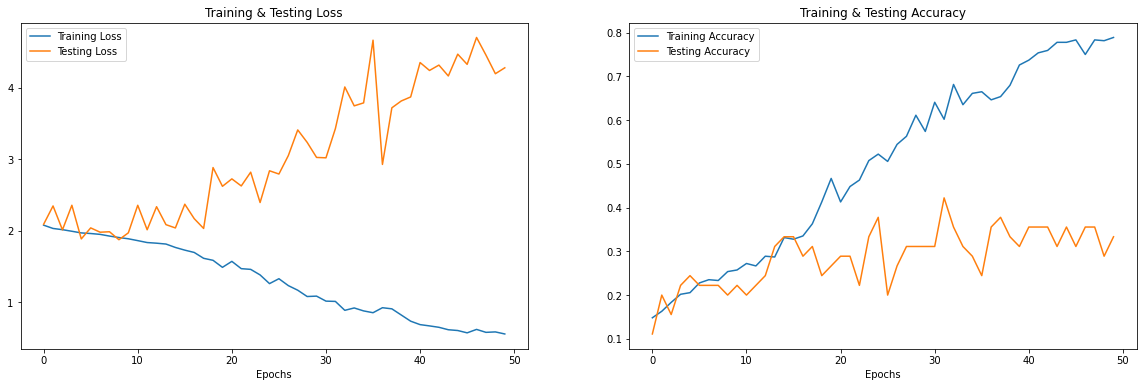

In [66]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [67]:
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

In [68]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

Predicted Labels Actual Labels
0          disgust          fear
1         surprise      surprise
2            happy         happy
3             fear          fear
4            angry         angry
5              sad       disgust
6              sad          calm
7            happy         happy
8            angry         angry
9              sad          fear

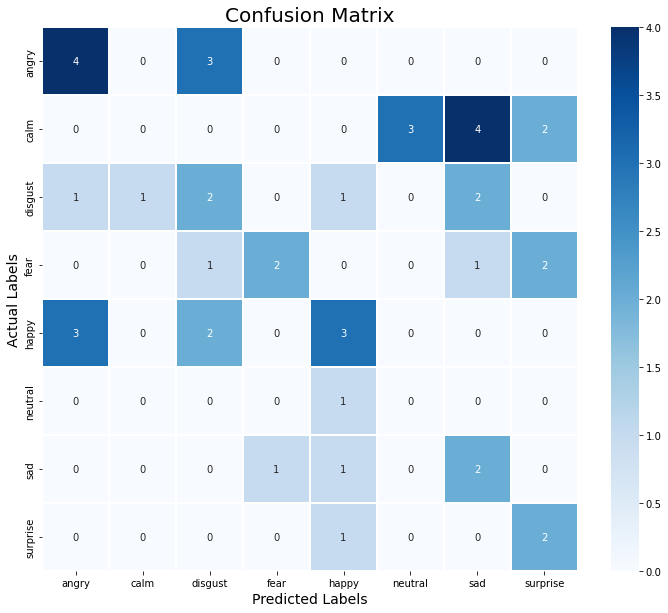

In [69]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.50      0.57      0.53         7
        calm       0.00      0.00      0.00         9
     disgust       0.25      0.29      0.27         7
        fear       0.67      0.33      0.44         6
       happy       0.43      0.38      0.40         8
     neutral       0.00      0.00      0.00         1
         sad       0.22      0.50      0.31         4
    surprise       0.33      0.67      0.44         3

    accuracy                           0.33        45
   macro avg       0.30      0.34      0.30        45
weighted avg       0.32      0.33      0.31        45

